# Water, Steam, and their Enthalpy  
In modelling geothermal systems, especially high enthalpy geothermal systems, we have often to consider two phases. Liquid water and steam. One interesting observation we can make when water starts boiling, is that there is a discontinuity, a jump in the systems enthalpy, when water goes from its liquid phase into the steam phase.

In [1]:
from iapws import iapws95, iapws97
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
temp = np.arange(1., 500., 2) + 273.15 # in K
pres = np.arange(0.1, 40., .4) # in MPa

palim = pres[::-1] # flip pressure vector. just for viz purposes

tsat = np.arange(274., 648., 2)
psat = np.zeros_like(tsat)

In [3]:
for i,j in enumerate(tsat):
    psat[i] = iapws97._PSat_T(j)

In [4]:
x,y = np.meshgrid(temp,pres[::-1])
hs = np.zeros_like(x)

In [5]:
for i in range(len(temp)):
    for j in range(len(pres)):
        water = iapws95.IAPWS95(T=temp[i], P=pres[::-1][j])
        hs[j, i] = water.h
        

(0, 40)

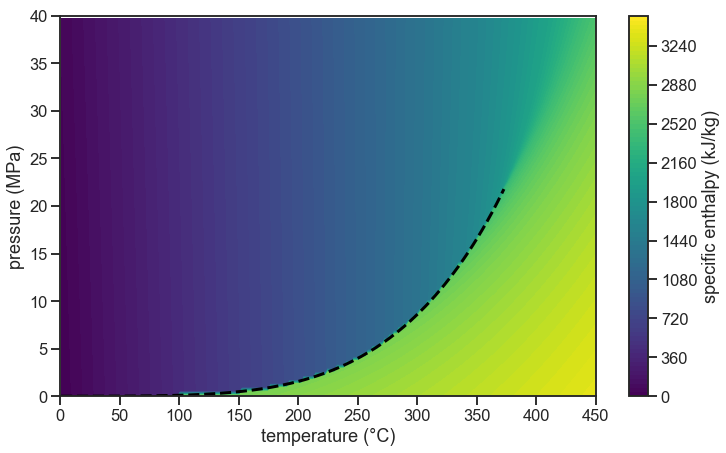

In [6]:
# simple plot of the phase diagram
fig = plt.figure(figsize=[12,7])
cs = plt.contourf(x - 273.15, y, hs,100, cmap='viridis')
plt.colorbar(cs, label='specific enthalpy (kJ/kg)')
plt.plot(tsat - 273.15, psat, 'k--', linewidth=3)
plt.xlabel('temperature (°C)')
plt.ylabel('pressure (MPa)')
plt.xlim([0, 450])
plt.ylim([0,40])

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


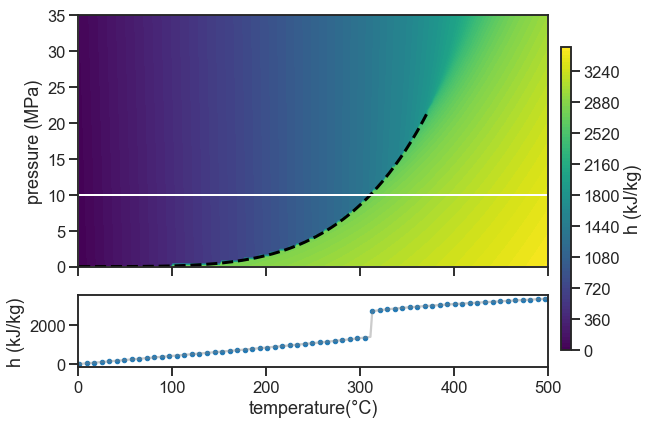

In [17]:
# make a figure with a horizontal slice at 10 MPa and plot the change in enthalpy
fig, ax = plt.subplots(2, 1, figsize=[8, 6], gridspec_kw={'height_ratios': [3.5, 1]}, sharex=True)
cs = ax[0].contourf(x - 273.15, y, hs, 100, cmap='viridis')
ax[0].plot(tsat - 273.15, psat, 'k--', linewidth=3)
ax[0].axhline(y=10, linewidth=2, color='white')
ax[0].set_ylabel('pressure (MPa)')
ax[0].set_xlim([0,500])
ax[0].set_ylim([0,35])

ax[1].plot(temp[::4] - 273.15, hs[74,::4], '.')
ax[1].plot(temp-273.15, hs[74,:], color='gray', alpha=.4)
ax[1].set_ylabel('h (kJ/kg)')
ax[1].set_xlabel('temperature(°C)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.98, .18, .018, .7])
fig.colorbar(cs, cax=cbar_ax, label='h (kJ/kg)')
fig.tight_layout();

fig.savefig('phasediagram.png', dpi=300, bbox_inches='tight')

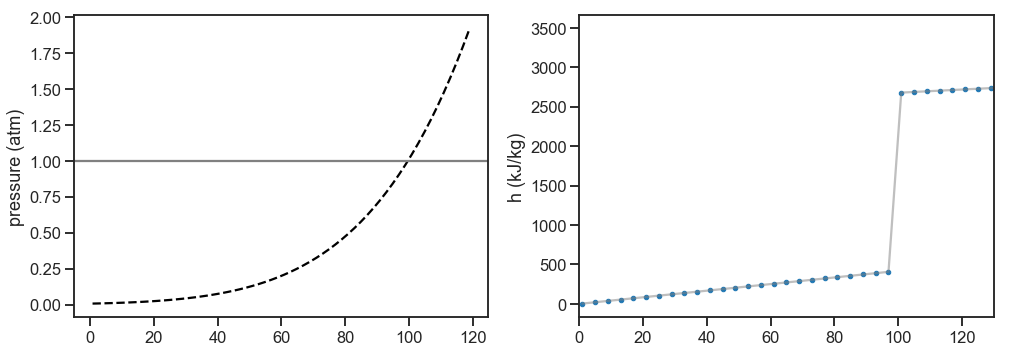

In [30]:
# and what does it look like for around atmospheric conditions?
fig, axs = plt.subplots(1,2, figsize=[14, 5])
axs[0].plot(tsat[:60]-273.15,psat[:60]*10,'k--')
axs[0].axhline(1, color='gray')
axs[0].set_ylabel('pressure (atm)')

axs[1].plot(temp[::2]-273.15, hs[-1,::2], '.')
axs[1].plot(temp[::2]-273.15, hs[-1,::2], '-', color='gray', alpha=.5)
axs[1].set_ylabel('h (kJ/kg)')
axs[1].set_xlim([0,130])

fig.tight_layout()